<a href="https://colab.research.google.com/github/sinking8/Medical-AI-Hackathon/blob/main/Medical_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retinal OCT Images Classification

In [ ]:
# Importing packages for environment setup
import zipfile
import os
from google.colab import drive

In [ ]:
# Uncomment if tensorflow is not present
!pip install tensorflow

## Environment Setup

In [ ]:
## Change runtimetype = "GPU" (runtime->runtimetype->GPU) 

# Mounting drive
drive.mount("/content/drive",force_remount=True)

# Drive directory
drive_dir = "/content/drive/My Drive"

# Change zipfile name here
file_name = "Neeraj.zip"

# Extracting zipfile
zip_ref = zipfile.ZipFile(os.path.join(drive_dir,file_name), 'r')
zip_ref.extractall("/content/data")
zip_ref.close()

Mounted at /content/drive


In [ ]:
# Declaring directories
data_dir =  '/content/data/' + 'Neeraj'
train_dir = 'train'
test_dir  = 'test'
# val_dir   =  'val'

# Creating Directories
labels = ["NORMAL","CNV","DME","DRUSEN"]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np
import glob

## Creating Dataset Pipeline

### Image Dataset Pipeline

In [ ]:
# Creating Data Generators

# Train Data Generator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False)

train_generator = train_datagen.flow_from_directory(
        os.path.join(data_dir,train_dir),
        target_size=(150, 150),
        batch_size=32,
        class_mode="categorical")


# Test Data Generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_dir,test_dir),
    target_size = (150,150),
    class_mode = "categorical"
)

Found 22488 images belonging to 6 classes.
Found 242 images belonging to 6 classes.


## Model Architecture

In [ ]:
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential,Model

In [ ]:
# Loading the Model
def load_model(model_dir):
  model = keras.models.load_model(model_dir)
  return model

# Saving the Model
def save_model(model,model_dir="./data/model"):
  model.save(model_dir)

# Creating the Model from the scratch
def create_model():
  # BASIC CONVOLUTION MODEL


  # Applying Transfer Learning
  # Adding VGG16
  # model.add(VGG16(include_top=False, weights=None,input_shape=(150,150,3), pooling=None, classes=4))

  # SINGLE INPUT MULTIPLE OUTPUT
  
  # Creating Sequential Model
  model = Sequential()

  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))

  # Flatten Layer
  model.add(layers.Flatten())

  # Dense Layer
  model.add(layers.Dense(6,activation='softmax'))


  # Compiling the model
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


  return model

In [ ]:

# Change the directory of the model
model_dir = "./data/base_model.h5"

## Remember to comment the other one

# Uncomment below if you are using a trained model
model = load_model(model_dir)

#model.save("base_model.h5")

# Uncomment below if ur training from scratch
#model = create_model()

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 73984)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                

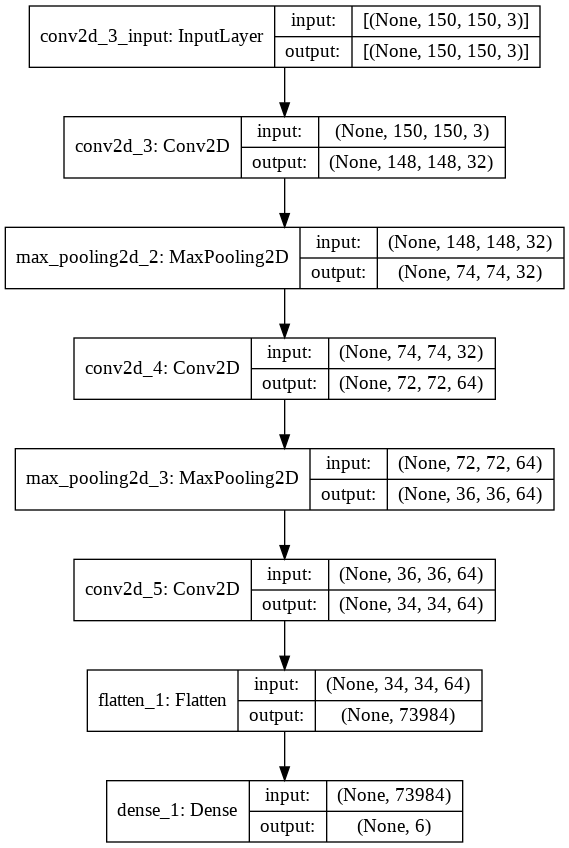

In [ ]:
# Plotting basic model architecure
keras.utils.plot_model(model, "base_model.png", show_shapes=True)

## Training The Model

In [ ]:
# Increase no of epochs if accuracy is below 90%
# Optimal no of epochs (10-50)
# Initial model is trained for 5 epochs

epochs = 5

# Training the model with the dataset
history = model.fit_generator(train_generator,epochs=epochs)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
703/703 [==============================] - 168s 239ms/step - loss: 0.2181 - accuracy: 0.9238
Epoch 2/5
703/703 [==============================] - 168s 239ms/step - loss: 0.2055 - accuracy: 0.9285
Epoch 3/5
703/703 [==============================] - 167s 237ms/step - loss: 0.1972 - accuracy: 0.9324
Epoch 4/5
703/703 [==============================] - 169s 240ms/step - loss: 0.1846 - accuracy: 0.9378
Epoch 5/5
703/703 [==============================] - 169s 241ms/step - loss: 0.1723 - accuracy: 0.9405


## Saving the Model

In [ ]:
## Save the model after training
## Add the location where the model needs to be saved (optional)
## Download the model after saving it.
save_model(model)

INFO:tensorflow:Assets written to: ./data/model/assets


## Metrics

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
test_score = model.evaluate(test_generator)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])

8/8 [==============================] - 1s 123ms/step - loss: 0.2024 - accuracy: 0.9463
[INFO] accuracy: 94.63%
[INFO] Loss:  0.2024044394493103


Text(0.5, 1.0, 'Accuracy Curves')

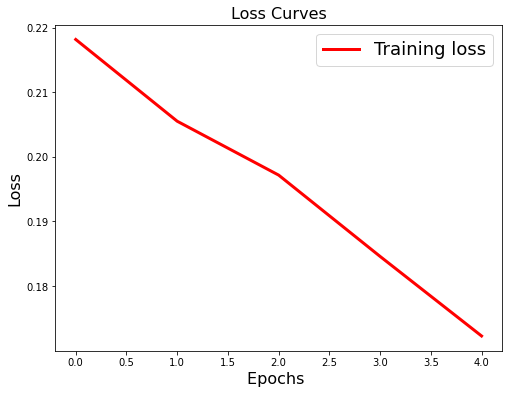

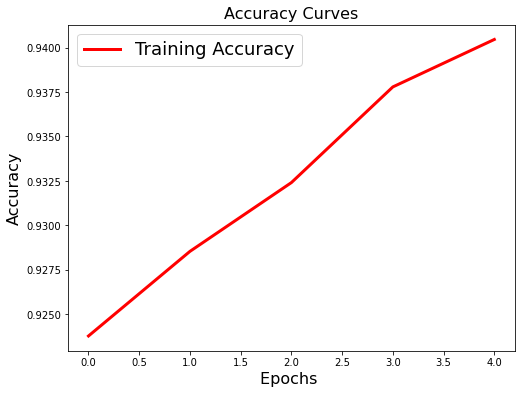

In [ ]:
# Loss Curves

plt.figure(figsize=[8,6])

plt.plot(history.history['loss'],'r',linewidth=3.0)

# plt.plot(history.history['val_loss'],'b',linewidth=3.0)

plt.legend(['Training loss', 'Validation Loss'],fontsize=18)

plt.xlabel('Epochs ',fontsize=16)

plt.ylabel('Loss',fontsize=16)

plt.title('Loss Curves',fontsize=16)

  
# Accuracy Curves

plt.figure(figsize=[8,6])

plt.plot(history.history['accuracy'],'r',linewidth=3.0)

# plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)

plt.xlabel('Epochs ',fontsize=16)

plt.ylabel('Accuracy',fontsize=16)

plt.title('Accuracy Curves',fontsize=16)